##### Function PCA_BERT 

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca_bert(input_file_path, output_file_path, n_components=2):
    # Load the embeddings
    embeddings = pd.read_csv(input_file_path)
    
    # Normalize the data
    scaler = StandardScaler()
    embeddings_scaled = scaler.fit_transform(embeddings)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    embeddings_pca = pca.fit_transform(embeddings_scaled)
    
    # Convert the result to a DataFrame
    embeddings_pca_df = pd.DataFrame(embeddings_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    
    # Save the PCA results to a CSV file
    embeddings_pca_df.to_csv(output_file_path, index=False)

# Example usage
input_file_path = 'vectorized_bert_300.csv'
output_file_path = 'pca_bert.csv'
pca_bert(input_file_path, output_file_path)


##### Analyzing and Visualizing the Results

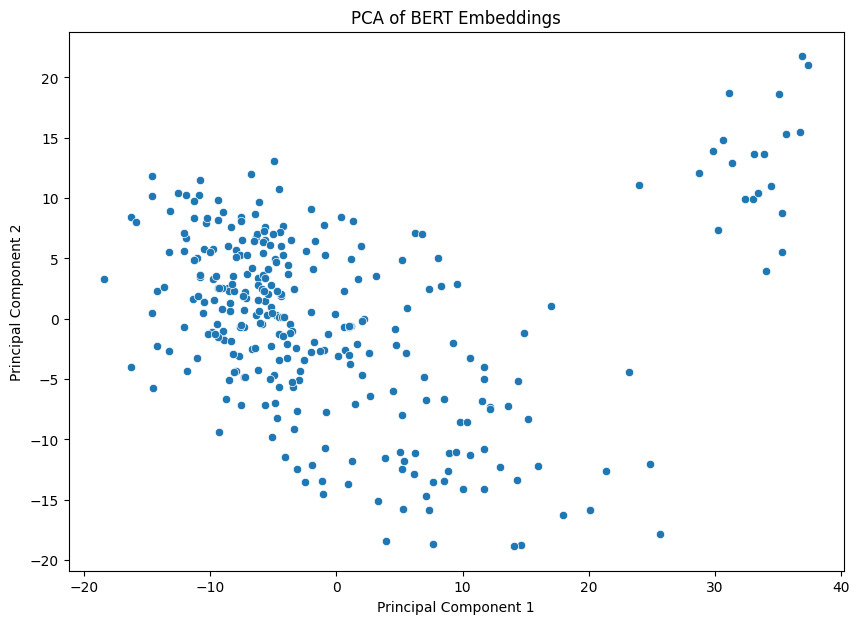

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA results
pca_results = pd.read_csv('pca_bert.csv')

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_results)
plt.title('PCA of BERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
